In [10]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [11]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [12]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [13]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [14]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine,reflect =True)


In [15]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [16]:
# Save references to each table
Measurement =Base.classes.measurement
Station =Base.classes.station

In [17]:
# Create our session (link) from Python to the DB
session =Session(engine)

# Exploratory Precipitation Analysis

In [18]:
# Find the most recent date in the data set.
from sqlalchemy import func
recent = session.query(func.max(Measurement.date)).scalar()
recent

'2017-08-23'

         Date  Precipitation
0  2016-08-23           0.00
1  2016-08-24           0.08
2  2016-08-25           0.08
3  2016-08-26           0.00
4  2016-08-27           0.00
         Date  Precipitation
0  2016-08-23           0.00
1  2016-08-24           0.08
2  2016-08-25           0.08
3  2016-08-26           0.00
4  2016-08-27           0.00
            Date  Precipitation
0     2016-08-23           0.00
1009  2016-08-23            NaN
1529  2016-08-23           1.79
704   2016-08-23           0.05
361   2016-08-23           0.15


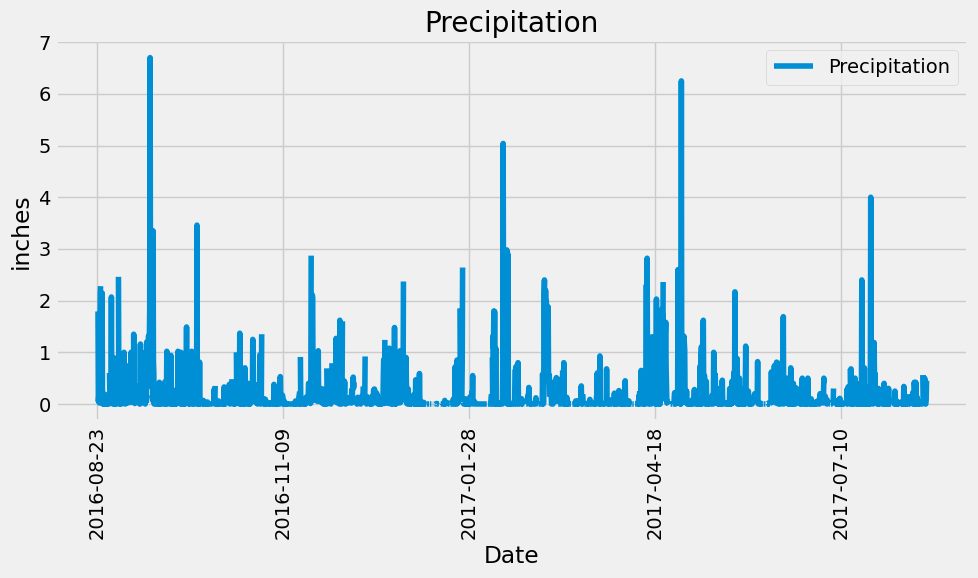

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.

# Query to retrieve the data and precipitation scores
query = """
        SELECT date, prcp
        FROM measurement
        WHERE date >= (SELECT DATE(MAX(date), '-1 year') FROM measurement)
        """

# Execute the query and load the results into a Pandas DataFrame
df = pd.read_sql_query(query, engine)

# Set column names
df.columns = ["Date", "Precipitation"]

# Display the DataFrame
print(df.head())

# Perform a query to retrieve the data and precipitation scores

# Query to retrieve the data and precipitation scores
query = """
        SELECT date, prcp
        FROM measurement
        WHERE date >= (SELECT DATE(MAX(date), '-1 year') FROM measurement)
        """

# Execute the query and load the results into a Pandas DataFrame
df = pd.read_sql_query(query, engine)

# Set column names
df.columns = ["Date", "Precipitation"]

# Display the DataFrame
print(df.head())

# Save the query results as a Pandas DataFrame. Explicitly set the column names


# Sort the dataframe by date
df_sorted = df.sort_values(by='Date')

print(df_sorted.head())

# Use Pandas Plotting with Matplotlib to plot the data
df_sorted.plot(x='Date', y='Precipitation', figsize=(10, 6))
plt.title('Precipitation')
plt.xlabel('Date')
plt.ylabel('inches')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [16]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_statistics = df_sorted['Precipitation'].describe()

# Print the summary statistics
print(summary_statistics)

count    2021.000000
mean        0.177279
std         0.461190
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64


In [25]:
#calculate the total number of stations
from sqlalchemy import create_engine, func
from sqlalchemy.orm import sessionmaker
from your_module import Base, Measurement  # Import your SQLAlchemy Base and Measurement model

# Create an engine to connect to your database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Create a session to interact with the database
Session = sessionmaker(bind=engine)
session = Session()

# Query to calculate the total number of stations
total_stations = session.query(func.count(Measurement.station.distinct())).scalar()

print("Total number of stations:", total_stations)

# Close the session
session.close()


Total number of stations: 9


# Exploratory Station Analysis

In [26]:
# Design a query to calculate the total number of stations in the dataset
#calculate the total number of stations
from sqlalchemy import create_engine, func
from sqlalchemy.orm import sessionmaker

# Create an engine to connect to your database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

# Create a session to interact with the database
Session = sessionmaker(bind=engine)
session = Session()

# Query to calculate the total number of stations
total_stations = session.query(func.count(Measurement.station.distinct())).scalar()

print("Total number of stations:", total_stations)

# Close the session
session.close()

Total number of stations: 9


In [27]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.id)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.id).desc()).all()

# Convert the query result into a list
station_counts = [(station, count) for station, count in active_stations]

# Print the list of stations and their counts
print("Most active stations:")
for station, count in station_counts:
    print(f"Station: {station}, Count: {count}")
    

Most active stations:
Station: USC00519281, Count: 2772
Station: USC00519397, Count: 2724
Station: USC00513117, Count: 2709
Station: USC00519523, Count: 2669
Station: USC00516128, Count: 2612
Station: USC00514830, Count: 2202
Station: USC00511918, Count: 1979
Station: USC00517948, Count: 1372
Station: USC00518838, Count: 511


In [30]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
from sqlalchemy import func

# Query to find the most active station
most_active_station_subquery = session.query(Measurement.station,
                                            func.count(Measurement.station).label('station_count'))\
                                     .group_by(Measurement.station)\
                                     .order_by(func.count(Measurement.station).desc())\
                                     .limit(1)\
                                     .subquery()

# Combined query to calculate lowest, highest, and average temperature for the most active station
result = session.query(most_active_station_subquery.c.station,
                       func.min(Measurement.tobs).label('min_temp'),
                       func.max(Measurement.tobs).label('max_temp'),
                       func.avg(Measurement.tobs).label('avg_temp'))\
                .filter(Measurement.station == most_active_station_subquery.c.station)\
                .group_by(Measurement.station)\
                .first()

# Extracting the results
station_id, lowest_temp, highest_temp, avg_temp = result

# Printing the results

print(f"Lowest Temperature: {lowest_temp}")
print(f"Highest Temperature: {highest_temp}")
print(f"Average Temperature: {avg_temp}")


Lowest Temperature: 54.0
Highest Temperature: 85.0
Average Temperature: 71.66378066378067


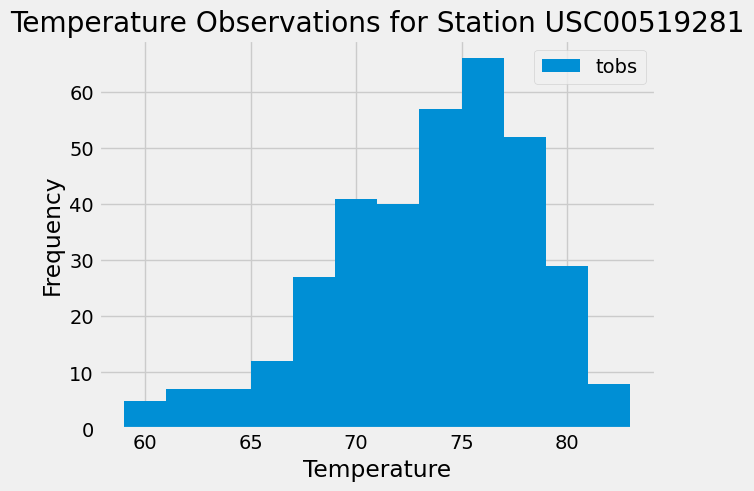

In [31]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
from sqlalchemy import func

# Query to find the most active station
most_active_station = session.query(Measurement.station,
                                    func.count(Measurement.station).label('station_count'))\
                             .group_by(Measurement.station)\
                             .order_by(func.count(Measurement.station).desc())\
                             .limit(1)\
                             .first()[0]  # Extracting the station ID

# Calculate the date one year ago from the last date in the dataset
last_date = session.query(func.max(Measurement.date)).scalar()
one_year_ago = dt.datetime.strptime(last_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Query the temperature observations for the most active station within the last 12 months
results = session.query(Measurement.tobs)\
                 .filter(Measurement.station == most_active_station)\
                 .filter(Measurement.date >= one_year_ago)\
                 .all()

# Save the query results into a Pandas DataFrame
df = pd.DataFrame(results, columns=['Temperature'])

# Plot the temperature observations as a histogram
plt.hist(df['Temperature'], bins=12, label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.title(f'Temperature Observations for Station {most_active_station}')
plt.legend()
plt.grid(True)
plt.show()


# Close Session

In [32]:
# Close Session
session.close()